In [1]:
import csv

In [2]:
file_path='../analysis/musicDouban250.csv'

In [3]:
album_names = []
album_links = []
album_ratings = []
rating_counts = []
artists = []
release_dates = []
types = []
media = []
genres = []

with open(file_path, 'r', newline='', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        album_names.append(row['专辑名称'])
        album_links.append(row['专辑链接'])
        album_ratings.append(float(row['专辑评分']))
        rating_counts.append(int(row['评分人数']))
        artists.append(row['歌手'])
        release_dates.append(row['发行日期'])
        types.append(row['类型'])
        media.append(row['介质'])
        genres.append(row['曲风'])

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## 展示评分最高的10个专辑的信息

In [59]:
# 将各个列表组合成一个新的列表
albums = list(zip(album_names, album_ratings, rating_counts, artists, release_dates, types, media, genres))

# 根据评分高低进行排序
sorted_albums = sorted(albums, key=lambda x: x[2], reverse=True)

# 输出评分最高的10个专辑的所有信息
for album in sorted_albums[:10]:
    album_name, album_rating, rating_count, artist, release_date, album_type, medium, genre = album
    print("Name:", album_name)
    print("Rating:", album_rating)
    print("Rating Counts:", rating_count)
    print("Artist:", artist)
    print("Release Date:", release_date)
    print("Type:", album_type)
    print("Medium:", medium)
    print("Genre:", genre)
    print("---------------------------")

Name: 范特西 Fantasy
Rating: 9.5
Rating Counts: 177661
Artist: 周杰伦
Release Date: 2001-09-14
Type: 专辑
Medium: CD
Genre: 流行
---------------------------
Name: 七里香 Common Jasmin Orange
Rating: 9.1
Rating Counts: 164994
Artist: 周杰伦
Release Date: 2004
Type: 专辑
Medium: CD
Genre: 流行
---------------------------
Name: Viva La Vida Death And All His Friends
Rating: 9.0
Rating Counts: 118408
Artist: Coldplay
Release Date: 2008-06-17
Type: 专辑
Medium: CD
Genre: 摇滚
---------------------------
Name: We Sing. We Dance. We Steal Things.
Rating: 9.1
Rating Counts: 116183
Artist: Jason Mraz
Release Date: 2008-05-13
Type: Import
Medium: Audio CD
Genre: 民谣
---------------------------
Name: 叶惠美 葉惠美 / Yeh Hui-Mei
Rating: 9.3
Rating Counts: 107599
Artist: 周杰伦
Release Date: 2003-07-31
Type: 专辑
Medium: CD
Genre: 流行
---------------------------
Name: 旅行的意义
Rating: 9.1
Rating Counts: 99372
Artist: 陈绮贞
Release Date: 2004-02-02
Type: 单曲
Medium: CD
Genre: 流行
---------------------------
Name: 十一月的萧邦 November's Chopin
Rati

## 展示专辑数量排名前20的歌手

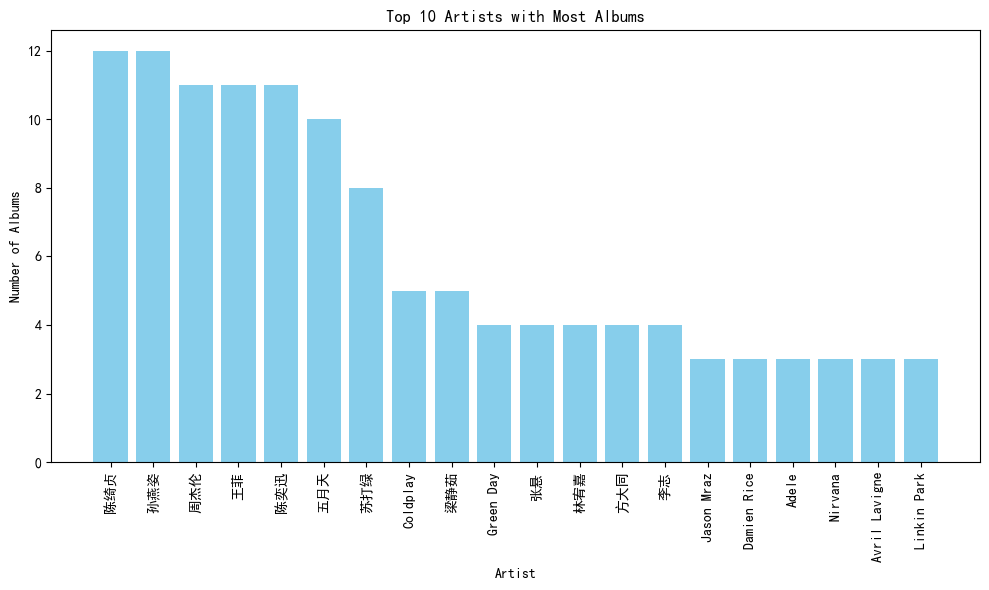

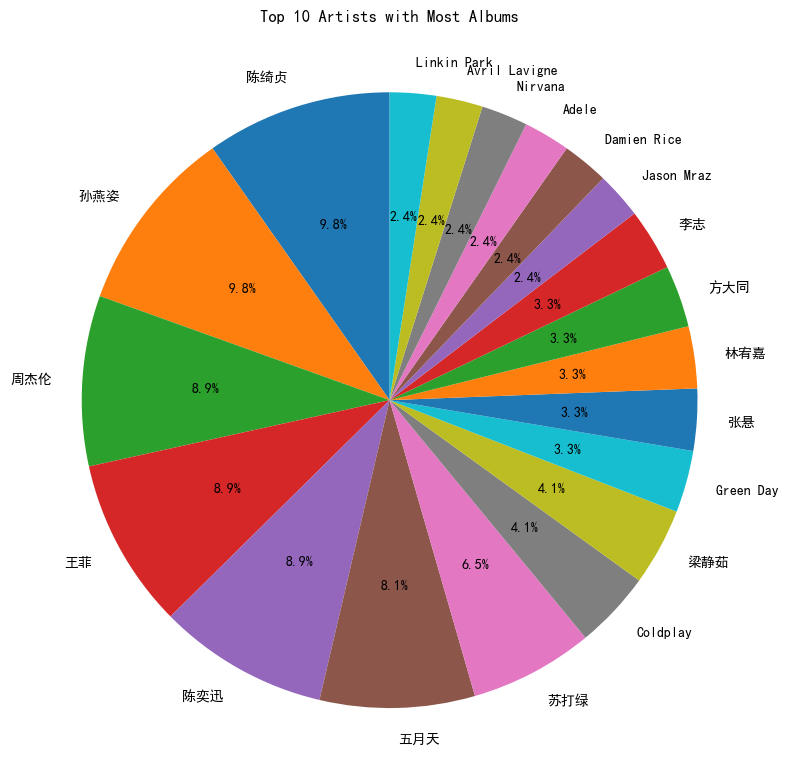

In [62]:
# 统计每个歌手的专辑数量
artist_counter = Counter(artists)

# 获取前10名歌手及其专辑数量
top_10_artists = artist_counter.most_common(20)
top_10_artists_names = [artist[0] for artist in top_10_artists]
top_10_artists_counts = [artist[1] for artist in top_10_artists]


plt.rcParams['font.sans-serif'] = ['SimHei']

# 柱状图
plt.figure(figsize=(10, 6))
plt.bar(top_10_artists_names, top_10_artists_counts, color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Number of Albums')
plt.title('Top 10 Artists with Most Albums')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 饼状图
plt.figure(figsize=(8, 8))
plt.pie(top_10_artists_counts, labels=top_10_artists_names, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Artists with Most Albums')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 统计评分

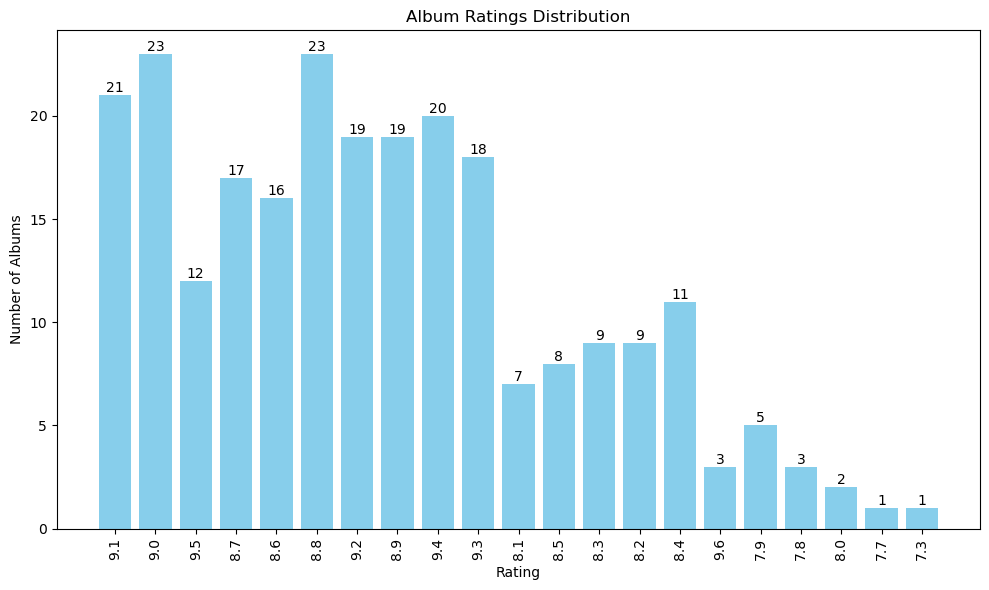

In [27]:
rating_counter = Counter(album_ratings)

# 获取评分和对应的专辑数量
ratings = list(rating_counter.keys())
counts = list(rating_counter.values())

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(range(len(ratings)), counts, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Number of Albums')
plt.title('Album Ratings Distribution')
plt.xticks(range(len(ratings)), ratings, rotation=90)
plt.tight_layout()

# 显示每个柱子上的数量标签
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

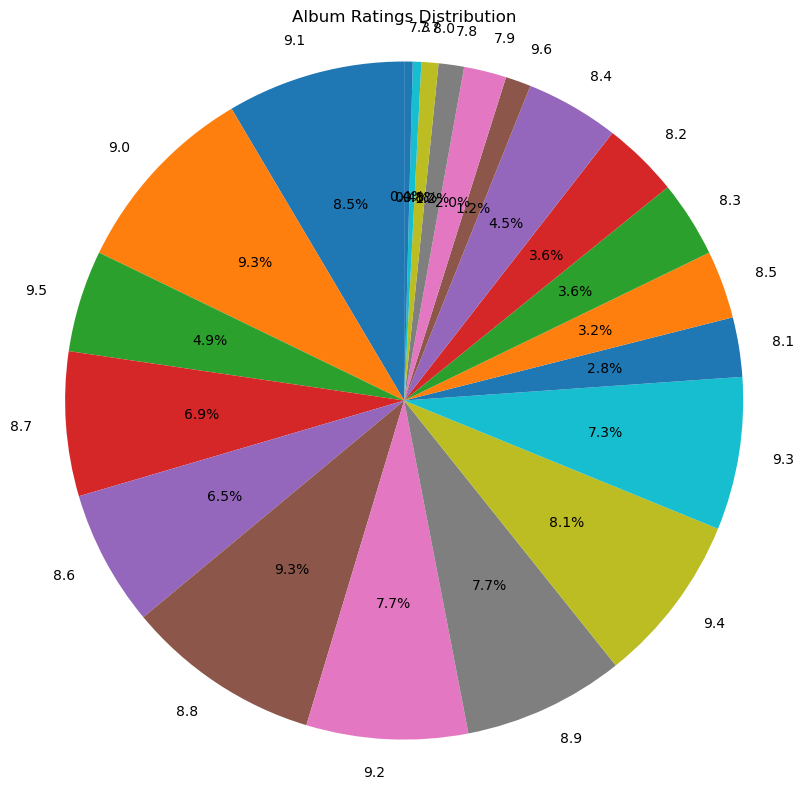

In [8]:
# 绘制饼状图
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=ratings, autopct='%1.1f%%', startangle=90)
plt.title('Album Ratings Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

## 按照评分高低排序评分和对应的专辑数量

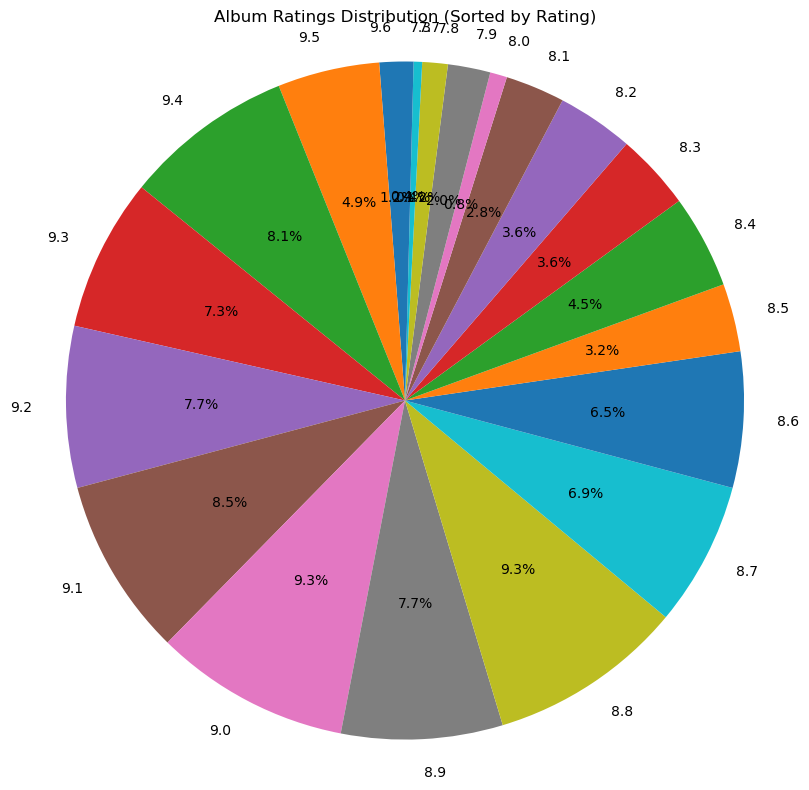

In [25]:
# 按照评分高低排序评分和对应的专辑数量
sorted_ratings = sorted(rating_counter.items(), key=lambda x: x[0], reverse=True)
sorted_counts = [item[1] for item in sorted_ratings]
sorted_ratings = [str(item[0]) for item in sorted_ratings]

# 绘制饼状图
plt.figure(figsize=(8, 8))
plt.pie(sorted_counts, labels=sorted_ratings, autopct='%1.1f%%', startangle=90)
plt.title('Album Ratings Distribution (Sorted by Rating)')
plt.axis('equal')
plt.tight_layout()
plt.show()

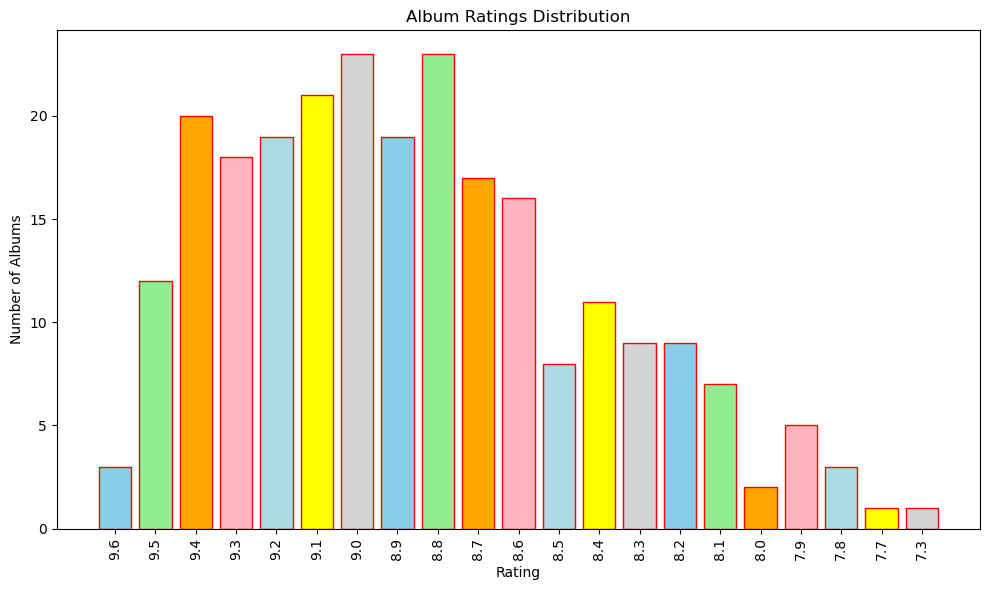

In [26]:
bar_colors = ['skyblue', 'lightgreen', 'orange', 'lightpink', 'lightblue', 'yellow', 'lightgray']
#bar_colors = ['skyblue','orange']

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(sorted_ratings, sorted_counts, ec='r',color=bar_colors)
plt.xlabel('Rating')
plt.ylabel('Number of Albums')
plt.title('Album Ratings Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 按照评分数量高低排序评分和对应的专辑数量

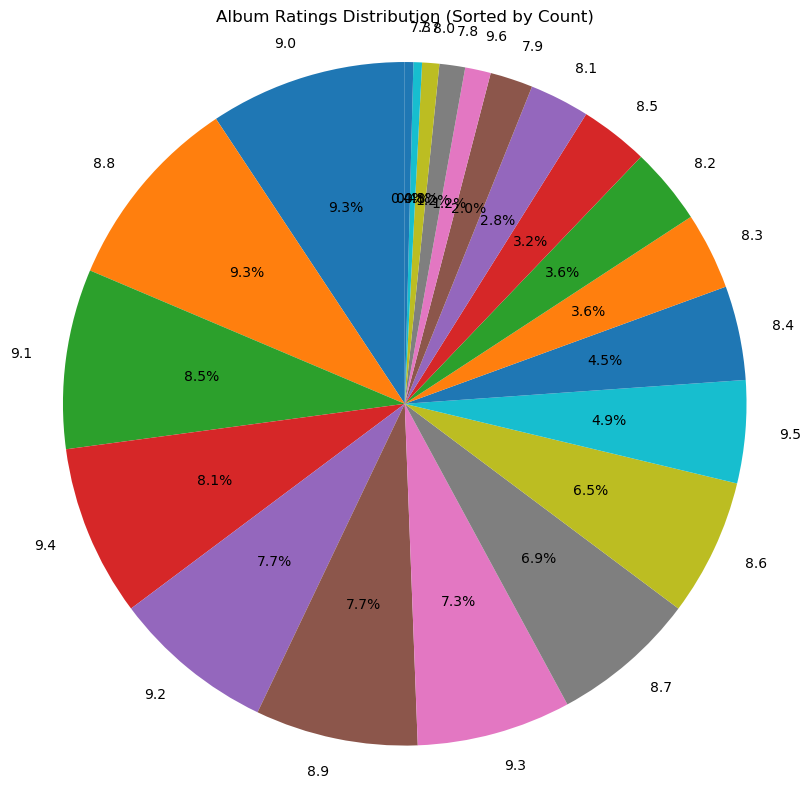

In [10]:
sorted_ratings = sorted(rating_counter.items(), key=lambda x: x[1], reverse=True)
sorted_counts = [item[1] for item in sorted_ratings]
sorted_ratings = [str(item[0]) for item in sorted_ratings]

# 绘制饼状图
plt.figure(figsize=(8, 8))
plt.pie(sorted_counts, labels=sorted_ratings, autopct='%1.1f%%', startangle=90)
plt.title('Album Ratings Distribution (Sorted by Count)')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 统计发行日期

In [28]:
print(release_dates)

['2008-05-13', '2008-06-17', '2005-09-23', '2001-09-14', '2008-10-23', '2011-03-08', '2008-09-23', '2008-01-11', '2004-02-02', '2009-01-22', '2007-05-22', '2004-08-24', '2004-09-21', '2007-07-06', '2007-11-02', '2007-07-20', '2009-05-22', '2003', '2005-06-13', '2003-07-31', '2004', '2011-01-24', '2006-06-09', '2000', '2011-11-11', '2009-10-30', '1991', '2002-07-19', '2000-11-13', '2000-07-10', '2000-12-7', '2000', '2002', '2005-11-01', '2008-12-19', '2006-10-20', '2009-08-19', '2003', '2010-11-12', '2003-03-25', '2004', '2005年9月', '2009-01-16', '2011-05-06', '2001-04-23', '2009-01-16', '2006', '2010-09-03', '2007-03-22', '1999-09-10', '2007-01-23', '2003-08-22', '2003-11-20', '2009-05-08', '2008-5-27', '2007-11-09', '2005', '1999-05-19', '2008-11-11', '2007-02-05', '2009-03-23', '2008-06-03', '2004-05-03', '2009-08-10', '2006-11-06', '2003', '2005年12月', '2007-01-11', '2009-08-11', '2006-09-05', '2001-07-09', '2005-10-07', '2006', '2002-08-09', '2004-05-12', '2004-10-1', '2008-08-19', '

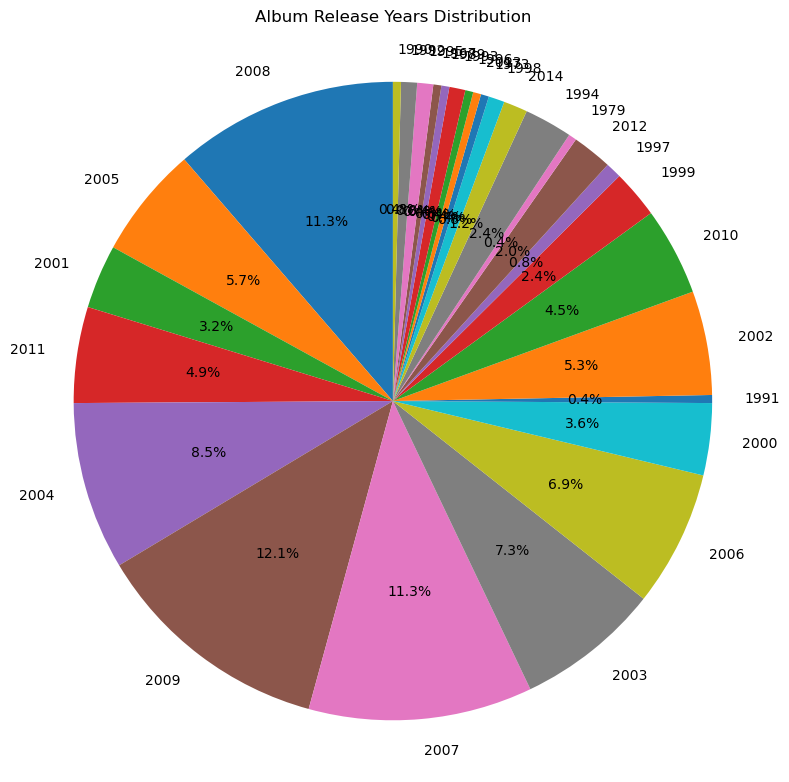

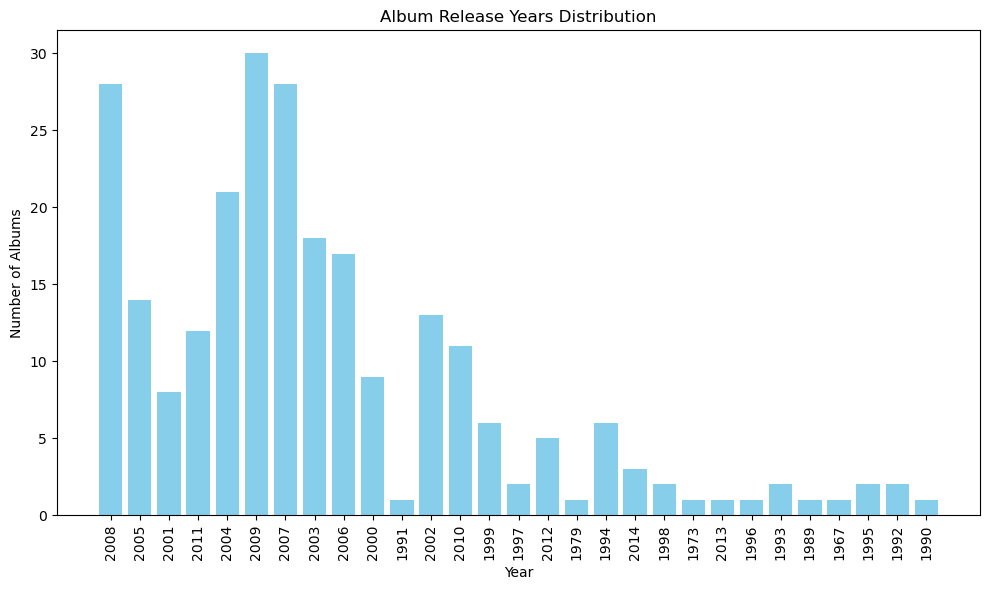

In [56]:
# 提取发行年份,有一些年份格式不对需要进一步处理
release_years = [date.split('-')[0] for date in release_dates]
release_years = [date.split('年')[0] for date in release_years]
release_years = [date.split('/')[0] for date in release_years]
for i in range(len(release_years)):
    date = release_years[i]
    if len(date.split(' ')) > 1:
        release_years[i] = date.split(' ')[2]

# 统计每个年份的专辑数量
year_counter = Counter(release_years)

# 获取年份和对应的专辑数量
years = list(year_counter.keys())
counts = list(year_counter.values())

# 饼状图
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=years, autopct='%1.1f%%', startangle=90)
plt.title('Album Release Years Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 柱状图
plt.figure(figsize=(10, 6))
plt.bar(years, counts, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Albums')
plt.title('Album Release Years Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 根据发行年份进行排序

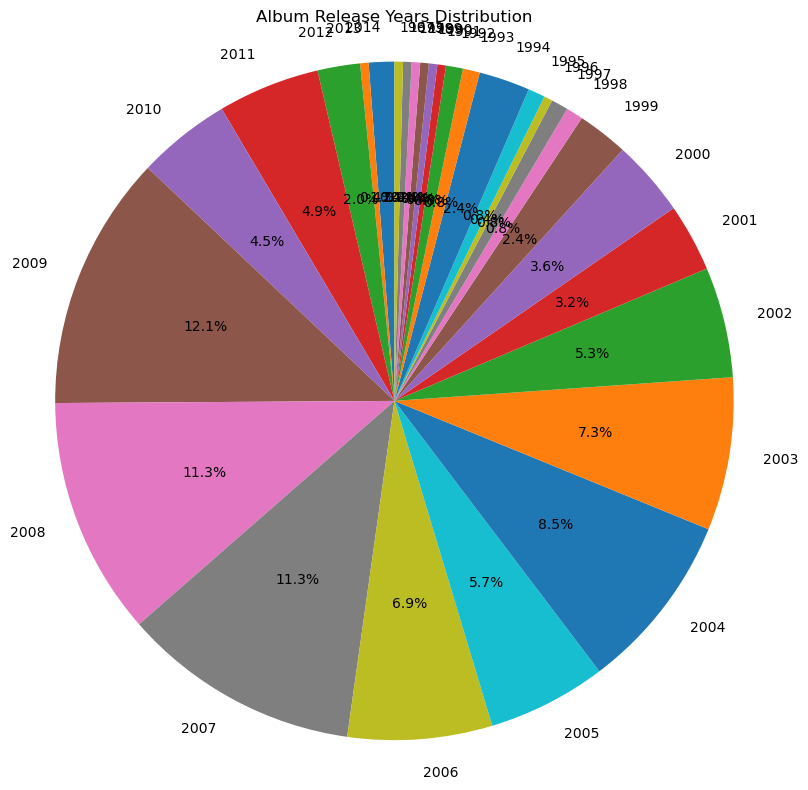

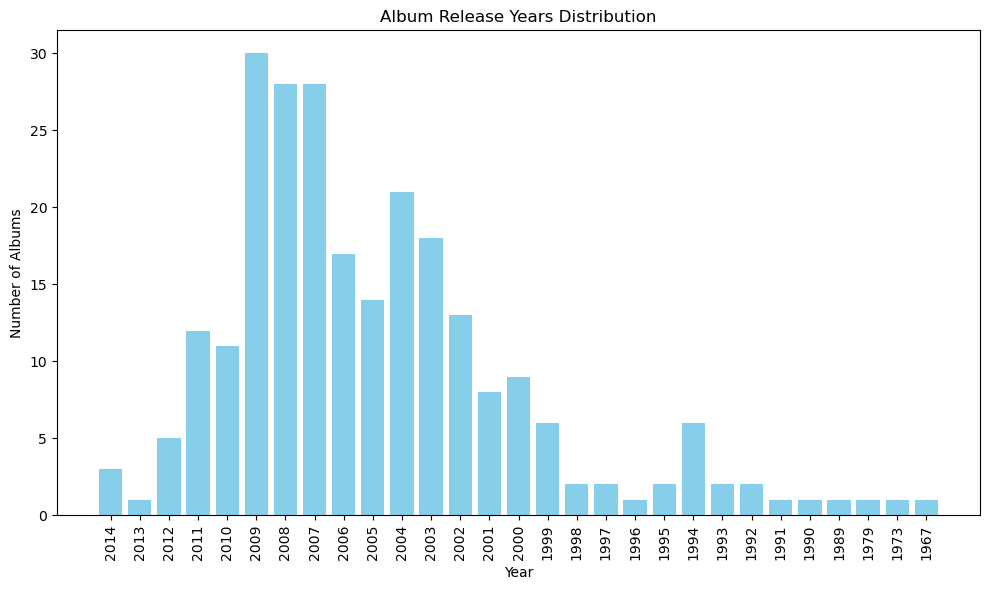

In [58]:
sorted_data = sorted(year_counter.items(), key=lambda x: x[0], reverse=True)
sorted_counts = [item[1] for item in sorted_data]
sorted_years = [str(item[0]) for item in sorted_data]

# 饼状图
plt.figure(figsize=(8, 8))
plt.pie(sorted_counts, labels=sorted_years, autopct='%1.1f%%', startangle=90)
plt.title('Album Release Years Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 柱状图
plt.figure(figsize=(10, 6))
plt.bar(sorted_years, sorted_counts, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Albums')
plt.title('Album Release Years Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()